In [11]:
import pandas as pd
df=pd.read_csv("breastcancer.csv")
X = df.iloc[:,2:]
y=df.iloc[:,1]
from sklearn.preprocessing import scale
xs=pd.DataFrame(scale(X))
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
k = int(round(np.sqrt(len(xs))))

In [4]:
k

24

In [5]:
comp = [5,6,7,8,9,10]
res_df  = list()
for i in comp:
    pca = PCA(n_components=i)
    proj = pca.fit_transform(xs)
    newx = pd.DataFrame(proj)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(proj,y)
    pred = model.predict(newx)
    tmp = list()
    tmp.append(metrics.accuracy_score(y,pred))
    tmp.append(metrics.precision_score(y,pred,average="weighted"))
    tmp.append(metrics.recall_score(y,pred,average="weighted"))
    tmp.append(metrics.f1_score(y,pred,average="weighted"))
    print(tmp)
    res_df.append(tmp)

[0.961335676625659, 0.9626967187868026, 0.961335676625659, 0.9609539667385142]
[0.9578207381370826, 0.9599636254386656, 0.9578207381370826, 0.9572969758071415]
[0.9595782073813708, 0.9615329957438369, 0.9595782073813708, 0.9591024883048241]
[0.9595782073813708, 0.9615329957438369, 0.9595782073813708, 0.9591024883048241]
[0.9595782073813708, 0.9615329957438369, 0.9595782073813708, 0.9591024883048241]
[0.961335676625659, 0.9631105302087363, 0.961335676625659, 0.9609054008172064]


In [6]:
res = pd.DataFrame(res_df).T
res.head()

,0,1,2,3,4,5
0,0.961336,0.957821,0.959578,0.959578,0.959578,0.961336
1,0.962697,0.959964,0.961533,0.961533,0.961533,0.963111
2,0.961336,0.957821,0.959578,0.959578,0.959578,0.961336
3,0.960954,0.957297,0.959102,0.959102,0.959102,0.960905


In [7]:
hmap=res
hmap.head()

,0,1,2,3,4,5
0,0.961336,0.957821,0.959578,0.959578,0.959578,0.961336
1,0.962697,0.959964,0.961533,0.961533,0.961533,0.963111
2,0.961336,0.957821,0.959578,0.959578,0.959578,0.961336
3,0.960954,0.957297,0.959102,0.959102,0.959102,0.960905


In [8]:
res.columns= comp
res['Metric']=['Accuracy','Precission','Recall','F1_Score']
res.set_index(['Metric'],inplace=True)
res.head()

,5,6,7,8,9,10
Metric,,,,,,
Accuracy,0.961336,0.957821,0.959578,0.959578,0.959578,0.961336
Precission,0.962697,0.959964,0.961533,0.961533,0.961533,0.963111
Recall,0.961336,0.957821,0.959578,0.959578,0.959578,0.961336
F1_Score,0.960954,0.957297,0.959102,0.959102,0.959102,0.960905


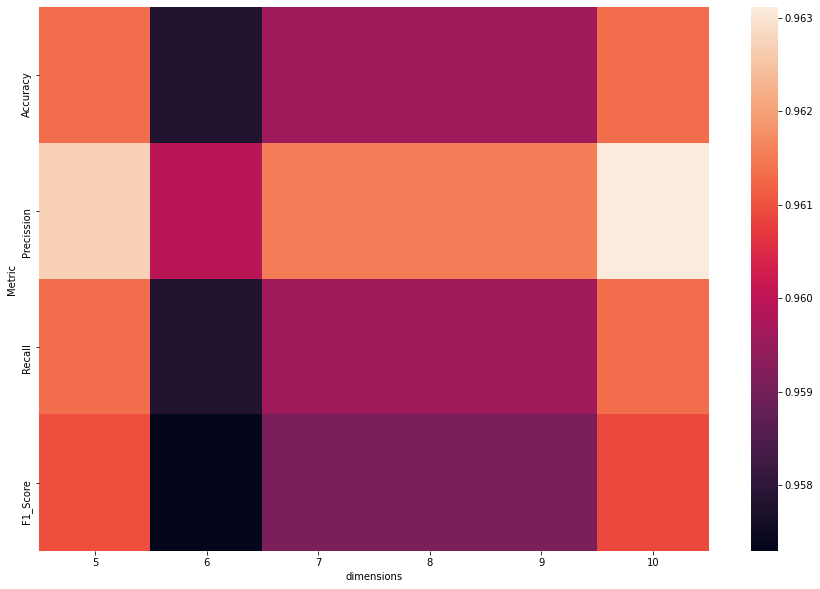

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(hmap)
plt.xlabel("dimensions")
plt.show()

In [18]:
@interact 
def funct(k=IntSlider(min=2,max=30,value=24, continuous_update=False),
          starting_adder=IntSlider(min=0,max=25,value=5, continuous_update=False)):
    a=starting_adder
    comp = [a,a+1,a+2,a+3,a+4,a+5]
    res_df  = list()
    for i in comp:
        pca = PCA(n_components=i)
        proj = pca.fit_transform(xs)
        newx = pd.DataFrame(proj)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(proj,y)
        pred = model.predict(newx)
        tmp = list()
        tmp.append(metrics.accuracy_score(y,pred))
        tmp.append(metrics.precision_score(y,pred,average="weighted"))
        tmp.append(metrics.recall_score(y,pred,average="weighted"))
        tmp.append(metrics.f1_score(y,pred,average="weighted"))
        res_df.append(tmp)
    res = pd.DataFrame(res_df).T
    hmap=res
    res.columns= comp
    res['Metric']=['Accuracy','Precission','Recall','F1_Score']
    res.set_index(['Metric'],inplace=True)
    plt.figure(figsize=(10,7))
    sns.heatmap(hmap)
    plt.xlabel("dimensions")
    plt.show()

interactive(children=(IntSlider(value=24, continuous_update=False, description='k', max=30, min=2), IntSlider(…